# K-Means Clustering

## Importing the libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# Reading the data file into a DATAFRAME and checking the shape 
dataset=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mall_Customers.csv")
print(dataset.shape)
dataset

(200, 5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [13]:
# calling head() method 
# storing in new variable
data_top = dataset.head()

In [14]:
# iterating the columns
for row in data_top.index:
    print(row, end = " ")

0 1 2 3 4 

#Getting column names in Pandas dataframe
Now let’s try to get the columns name from the  dataset.


#Method #1: Simply iterating over columns 

In [16]:
for col in dataset.columns:
    print(col)

CustomerID
Genre
Age
Annual Income (k$)
Spending Score (1-100)


#Method #2: Using columns with dataframe object 

In [17]:
# list(data) or
list(dataset.columns)

['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

#Method #3: column.values method returns an array of indexes. 

In [18]:
list(dataset.columns.values)

['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

#Method #4: Using tolist() method with values with given the list of columns. 

In [ ]:
list(dataset.columns.values.tolist())

['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

#Method #5: Using sorted() method
Sorted() method will return the list of columns sorted in alphabetical order. 

In [ ]:
# using sorted() method
sorted(dataset)

['Age', 'Annual Income (k$)', 'CustomerID', 'Genre', 'Spending Score (1-100)']

#Select rows and columns using labels

In [ ]:
dataset.loc[:,"Age"]

0      19
1      21
2      20
3      23
4      31
       ..
195    35
196    45
197    32
198    32
199    30
Name: Age, Length: 200, dtype: int64

In [ ]:
dataset["Age"]

0      19
1      21
2      20
3      23
4      31
       ..
195    35
196    45
197    32
198    32
199    30
Name: Age, Length: 200, dtype: int64

In [ ]:
dataset.Age

0      19
1      21
2      20
3      23
4      31
       ..
195    35
196    45
197    32
198    32
199    30
Name: Age, Length: 200, dtype: int64

#To select multiple columns.

In [ ]:
dataset.loc[:, ["Age", "Genre"]]

,Age,Genre
0,19,Male
1,21,Male
2,20,Female
3,23,Female
4,31,Female
...,...,...
195,35,Female
196,45,Female
197,32,Male
198,32,Male


In [ ]:
dataset[["Age", "Genre"]]

,Age,Genre
0,19,Male
1,21,Male
2,20,Female
3,23,Female
4,31,Female
...,...,...
195,35,Female
196,45,Female
197,32,Male
198,32,Male


#Select a row by its label.

In [ ]:
dataset.loc[0]

CustomerID                   1
Genre                     Male
Age                         19
Annual Income (k$)          15
Spending Score (1-100)      39
Name: 0, dtype: object

#Select multiple rows by label.

In [ ]:
dataset.loc[[0,1]]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


#Accessing values by row and column label.

In [ ]:
dataset.loc[0,"Age"]

19

#Accessing values from multiple columns of same row.

In [ ]:
dataset.loc[1,["Age", "Genre"]]

Age        21
Genre    Male
Name: 1, dtype: object

#Select by Index Position

we can select data from a Pandas DataFrame by its location. 

Note, Pandas indexing starts from zero.

Select a row by index location.

In [ ]:
dataset.iloc[0]

CustomerID                   1
Genre                     Male
Age                         19
Annual Income (k$)          15
Spending Score (1-100)      39
Name: 0, dtype: object

#Select a column by index location.

In [ ]:
dataset.iloc[:, 3]

0       15
1       15
2       16
3       16
4       17
      ... 
195    120
196    126
197    126
198    137
199    137
Name: Annual Income (k$), Length: 200, dtype: int64

 #Select data at the specified row and column location.

In [ ]:
dataset.iloc[0,3]

15

#Select list of rows and columns.

In [ ]:
dataset.iloc[[1,2],[0, 1]]

,CustomerID,Genre
1,2,Male
2,3,Female


#Slicing Rows and Columns by position

To slice a Pandas dataframe by position use the iloc attribute. 

Remember index starts from 0 to (number of rows/columns - 1).

To slice rows by index position.

In [ ]:
dataset.iloc[0:2,:]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


#To slice columns by index position.

In [ ]:
dataset.iloc[:,1:3]

,Genre,Age
0,Male,19
1,Male,21
2,Female,20
3,Female,23
4,Female,31
...,...,...
195,Female,35
196,Female,45
197,Male,32
198,Male,32


#To slice row and columns by index position.

In [ ]:
dataset.iloc[1:2,1:3]

,Genre,Age
1,Male,21


In [ ]:
dataset.iloc[:2,:2]

,CustomerID,Genre
0,1,Male
1,2,Male


#Subsetting by boolean conditions
we can use boolean conditions to obtain a subset of the data from the DataFrame.

Select rows based on column value


To select all rows whose column contain the specified value(s).

In [ ]:
dataset[dataset.CustomerID == 9]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
8,9,Male,64,19,3


In [ ]:
dataset.loc[dataset.Age == 64]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
8,9,Male,64,19,3


In [ ]:

X = dataset.iloc[:, [3, 4]].values

## Using the elbow method to find the optimal number of clusters

In [25]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

NameError: ignored

## Training the K-Means model on the dataset

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

## Visualising the clusters

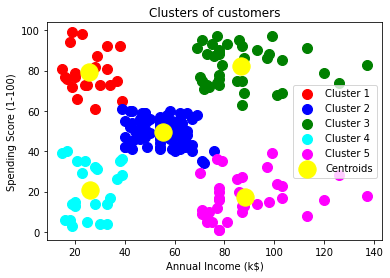

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

#Python Implementation of the K-Means Clustering Algorithm

#Here’s how to use Python to implement the K-Means Clustering Algorithm. These are the steps you need to take:

1.Data pre-processing

2.Finding the optimal number of clusters using the elbow method

3.Training the K-Means algorithm on the training data set

4.Visualizing the clusters

#1. Data Pre-Processing. Import the libraries, datasets, and extract the independent variables.

In [22]:
# importing libraries    

import numpy as nm    

import matplotlib.pyplot as mtp    

import pandas as pd    

# Importing the dataset  



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [19]:
dataset=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mall_Customers.csv")

In [20]:
x = dataset.iloc[:, [3, 4]].values

#2. Find the optimal number of clusters using the elbow method. Here’s the code you use:

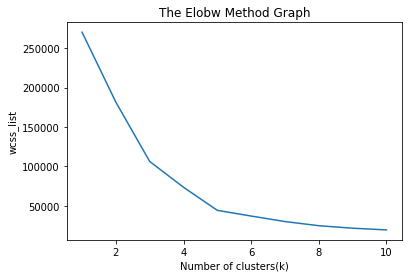

In [23]:
#finding optimal number of clusters using the elbow method  

from sklearn.cluster import KMeans  

wcss_list= []  #Initializing the list for the values of WCSS  

#Using for loop for iterations from 1 to 10.  

for i in range(1, 11):  

    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  

    kmeans.fit(x)  

    wcss_list.append(kmeans.inertia_)  

mtp.plot(range(1, 11), wcss_list)  

mtp.title('The Elobw Method Graph')  

mtp.xlabel('Number of clusters(k)')  

mtp.ylabel('wcss_list')  

mtp.show() 



3. Train the K-means algorithm on the training dataset.

Use the same two lines of code used in the previous section. However, instead of using i, use 5, because there are 5 clusters that need to be formed. Here’s the code:

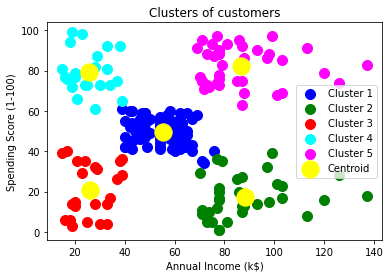

In [24]:
#training the K-means model on a dataset  

kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  

y_predict= kmeans.fit_predict(x) 

#4. Visualize the Clusters. Since this model has five clusters, we need to visualize each one.

#visulaizing the clusters  

mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  

mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  

mtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  

mtp.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  

mtp.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  

mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   

mtp.title('Clusters of customers')  

mtp.xlabel('Annual Income (k$)')  

mtp.ylabel('Spending Score (1-100)')  

mtp.legend()  

mtp.show()  

